In [ ]:
# Author       : Nupur Sarkar
# E-Mail       : sarkarnupur91@gmail.com
# Contact      : +91-7902414087
# Designation  : Data Science Learner

## Import the required libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
# import pydotplus

## Read the Data from the CSV

In [2]:
dummy_df = pd.read_csv("C:/Users/Nupur sarkar/Desktop/data_science/csvs/bank.csv",na_values =['NA'])
temp = dummy_df.columns.values
temp

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'deposit'],
      dtype=object)

In [4]:
contact_df = dummy_df

In [5]:
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    res_df['job'] = le.fit_transform(res_df['job'])
    res_df['marital'] = le.fit_transform(res_df['marital'])
    res_df['education'] = le.fit_transform(res_df['education'])
    res_df['default'] = le.fit_transform(res_df['default'])
    res_df['housing'] = le.fit_transform(res_df['housing'])
    res_df['month'] = le.fit_transform(res_df['month'])
    res_df['loan'] = le.fit_transform(res_df['loan'])
    res_df['contact'] = le.fit_transform(res_df['contact'])
    res_df['day_of_week'] = le.fit_transform(res_df['day'])
    res_df['poutcome'] = le.fit_transform(res_df['poutcome'])
    res_df['deposit'] = le.fit_transform(res_df['deposit'])
    return res_df

In [6]:
encoded_df = preprocessor(contact_df)  #creating dependent and independent variable

x = encoded_df.drop(['deposit'],axis =1).values
y = encoded_df['deposit'].values

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.10)

In [49]:
# Decision tree with depth = 2
model_dt_2 = DecisionTreeClassifier(random_state=1, max_depth=2)
model_dt_2.fit(x_train, y_train)
model_dt_2_score_train = model_dt_2.score(x_train, y_train)
print("Training score: ",model_dt_2_score_train)
model_dt_2_score_test = model_dt_2.score(x_test, y_test)
print("Testing score: ",model_dt_2_score_test)
#y_pred_dt = model_dt_2.predict_proba(x_test)[:, 1]

Training score:  0.7109009457441513
Testing score:  0.7144136078782453


In [50]:
# Decision tree with depth = 6
model_dt_4 = DecisionTreeClassifier(random_state=1, max_depth=6)
model_dt_4.fit(x_train, y_train)
model_dt_4_score_train = model_dt_4.score(x_train, y_train)
print("Training score: ",model_dt_4_score_train)
model_dt_4_score_test = model_dt_4.score(x_test, y_test)
print("Testing score: ",model_dt_4_score_test)


Training score:  0.8236933797909408
Testing score:  0.8093106535362579


In [51]:
# Decision tree with depth = 7
model_dt_8 = DecisionTreeClassifier(random_state=1, max_depth=12, criterion = "gini",min_samples_split=4, 
                 min_samples_leaf=8)
model_dt_8.fit(x_train, y_train)
model_dt_8_score_train = model_dt_8.score(x_train, y_train)
print("Training score: ",model_dt_8_score_train)
model_dt_8_score_test = model_dt_8.score(x_test, y_test)
print("Testing score: ",model_dt_8_score_test)

Training score:  0.8752613240418119
Testing score:  0.8191584601611459


In [23]:
#Decision tree

#model_dt = DecisionTreeClassifier(max_depth = 8, criterion ="entropy")
#model_dt.fit(x_train, y_train)
#y_pred_dt = model_dt.predict_proba(x_test)[:, 1]


## Performance Metrics

In [52]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

ValueError: Found input variables with inconsistent numbers of samples: [1117, 3349]

In [53]:
predictions = model_dt_8.predict(x_test)
predictions
# Model Accuracy
print (model_dt_8.score(x_test, y_test))
y_actual_result = y_test[0]

0.8191584601611459


In [54]:
for i in range(len(predictions)):
    if(predictions[i] == 1):
        y_actual_result = np.vstack((y_actual_result, y_test[i]))

## Recall

In [55]:
#Recall
y_actual_result = y_actual_result.flatten()
count = 0
for result in y_actual_result:
     if(result == 1):
        count=count+1

print ("true yes|predicted yes:")
print (count/float(len(y_actual_result)))

true yes|predicted yes:
0.8127340823970037


## Area Under the Curve

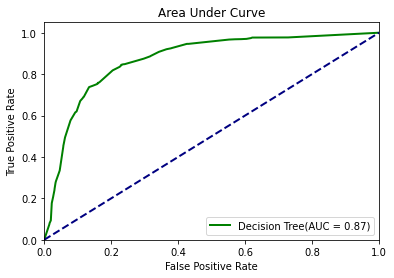

In [56]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

## Confusion Matrix

In [57]:
print (confusion_matrix(y_test, predictions))

[[481  99]
 [103 434]]


In [58]:
accuracy_score(y_test, predictions)

0.8191584601611459

In [59]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=["Success", "Default"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

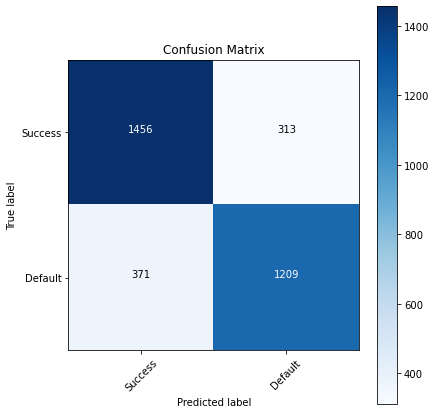

In [40]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(predictions, normalize=False)
plt.show()